# **DATA PROCESSING**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

In [3]:
df = pd.read_csv("neo_v2[1].csv")

In [4]:
df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [5]:
df.tail()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,Earth,False,25.00,False
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,Earth,False,26.00,False
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,Earth,False,24.60,False
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,Earth,False,27.80,False
90835,54205447,(2021 TW7),0.039862,0.089133,27024.455553,5.977213e+07,Earth,False,24.12,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [7]:
df.shape

(90836, 10)

In [8]:
df.dtypes

id                      int64
name                   object
est_diameter_min      float64
est_diameter_max      float64
relative_velocity     float64
miss_distance         float64
orbiting_body          object
sentry_object            bool
absolute_magnitude    float64
hazardous                bool
dtype: object

# **Data Cleaning**

1. Misssing Values: This dataset is report (or) is a record of all the asteroids, meteors, detached rocket particles drifting in space and revolving around earth’s orbit. There are no null, missing, and NaN values in this dataset. Some null are present in ‘Estimated diameter max’ column but these values are used for classification

2. Clear Formatting: We used clear formatting in our code to make the columns more readable and simplified to use in the EDA process, this process is also used to implement another data cleaning method (splitting).

3. Outliners: Outliners in the data are a separate set of data points which stays with the rest of the values, within the dataset the outliners can fluctuate the output. Outliners can be detected when abnormal distribution of data points occur (or) we can use boxplot function to detect the outliners. Here in our data we are removing 75% of the outliners because the data distribution is disturbed and the output graphs are being fluctuated.

 We used IQR method to split the outliners using quantile function

4. Splitting Columns: In our data-frame we are splitting columns into 2 and adding them to our dataset in order to perform further classification, categorical columns are being split into 2. By using this method we can understand the data properly.

5. Duplicate Entries: Our dataset does not have any duplicated values and if we had duplicate values they are important because our dataset is based on the micro details, even the decimals are important for the classification process because our dataset revolves around all the object that might hit the earth, so due to lack of visual observation of the tiny particles we rely on this data.

6. Inconsistent Data: Our dataset has many inconsistent data but these values are useful for further processing, for example in the column ‘Estimated diameter max’ there are similar values, NaN values all the values are replaced to 0 because the all the information missing in this column can be compensated from another column.

7. Data Transformation: This process is essential because our dataset contains over 90000 rows, all the EDA graphs should be plotted in a large scale all the graphs are skewed to the left and some are skewed to the right so we use log transformation to normalize the data and use this normalized data to plot graphs.

# **Missing Values**

In [9]:
df.nunique()

id                    27423
name                  27423
est_diameter_min       1638
est_diameter_max       1638
relative_velocity     90828
miss_distance         90536
orbiting_body             1
sentry_object             1
absolute_magnitude     1638
hazardous                 2
dtype: int64

In [10]:
df.isnull().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [11]:
df.isnull().sum()/(len(df))*100

id                    0.0
name                  0.0
est_diameter_min      0.0
est_diameter_max      0.0
relative_velocity     0.0
miss_distance         0.0
orbiting_body         0.0
sentry_object         0.0
absolute_magnitude    0.0
hazardous             0.0
dtype: float64

<AxesSubplot:>

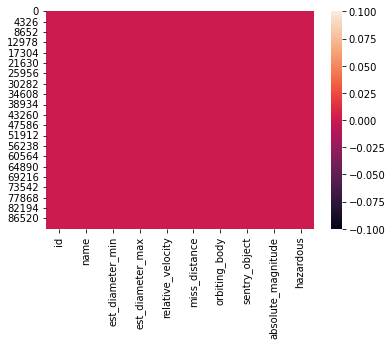

In [12]:
sns.heatmap(df.isnull())

In [13]:
df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


# **Clear Formatting**

In [14]:
df.rename(columns={'id': 'ID'}, inplace=True)
df.head()

,ID,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [15]:
df.rename(columns={'name': 'Name'}, inplace=True)
df.head()

,ID,Name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [16]:
df.rename(columns={'est_diameter_min': 'Estimated_diameter_MIN'}, inplace=True)
df.head()

,ID,Name,Estimated_diameter_MIN,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [17]:
df.rename(columns={'est_diameter_max': 'Estimated_diameter_MAX'}, inplace=True)
df.head()

,ID,Name,Estimated_diameter_MIN,Estimated_diameter_MAX,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [18]:
df.rename(columns={'sentry_object': 'Monitored_by_Sentry'}, inplace=True)
df.head()

,ID,Name,Estimated_diameter_MIN,Estimated_diameter_MAX,relative_velocity,miss_distance,orbiting_body,Monitored_by_Sentry,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [19]:
df.rename(columns={'absolute_magnitude': 'Impact_Magnitude'}, inplace=True)
df.head()

,ID,Name,Estimated_diameter_MIN,Estimated_diameter_MAX,relative_velocity,miss_distance,orbiting_body,Monitored_by_Sentry,Impact_Magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


# **Outliners**

In [20]:
print(df.columns.unique())
print(df.columns.nunique())

Index(['ID', 'Name', 'Estimated_diameter_MIN', 'Estimated_diameter_MAX',
       'relative_velocity', 'miss_distance', 'orbiting_body',
       'Monitored_by_Sentry', 'Impact_Magnitude', 'hazardous'],
      dtype='object')
10


In [21]:
categorical_columns=df.select_dtypes(include=['object']).columns
Numerical_columns = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Values:")
print(categorical_columns)
print("Numerical Values:")
print(Numerical_columns)

Categorical Values:
Index(['Name', 'orbiting_body'], dtype='object')
Numerical Values:
['ID', 'Estimated_diameter_MIN', 'Estimated_diameter_MAX', 'relative_velocity', 'miss_distance', 'Impact_Magnitude']


<AxesSubplot:>

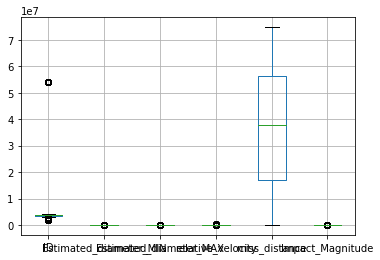

In [22]:
df.boxplot(Numerical_columns)

<AxesSubplot:>

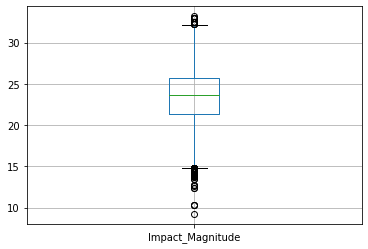

In [23]:
df.boxplot('Impact_Magnitude')

In [24]:
split1 = df['Impact_Magnitude'].quantile(0.25)
split2 = df['Impact_Magnitude'].quantile(0.75)

In [25]:
IQR_func=split2-split2
Upper_bound = split2 + 1.5 * IQR_func
Lower_bound = split2 - 1.5 * IQR_func
df[df['Impact_Magnitude'] > Upper_bound]
df[df['Impact_Magnitude'] < Lower_bound]
new_df = df[df['Impact_Magnitude'] < Upper_bound]
new_df1 = df[df['Impact_Magnitude'] > Lower_bound]
new_df.shape
new_df1.shape

(22166, 10)

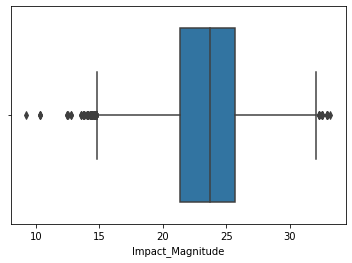

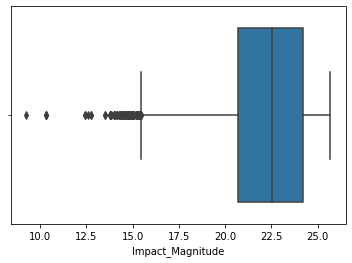

In [26]:
sns.boxplot(df['Impact_Magnitude'])
plt.show()
sns.boxplot(new_df['Impact_Magnitude'])
plt.show()

In [27]:
split1 = df['Estimated_diameter_MIN'].quantile(0.25)
split2 = df['Estimated_diameter_MIN'].quantile(0.75)

In [28]:
IQR_func=split2-split2
Upper_bound = split2 + 1.5 * IQR_func
Lower_bound = split2 - 1.5 * IQR_func
df[df['Estimated_diameter_MIN'] > Upper_bound]
df[df['Estimated_diameter_MIN'] < Lower_bound]
new_df = df[df['Estimated_diameter_MIN'] < Upper_bound]
new_df.shape

(68095, 10)

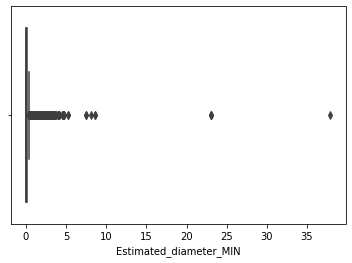

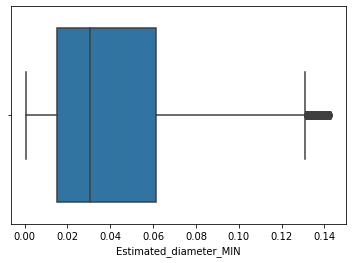

In [29]:
sns.boxplot(df['Estimated_diameter_MIN'])
plt.show()
sns.boxplot(new_df['Estimated_diameter_MIN'])
plt.show()

In [30]:
split1 = df['Estimated_diameter_MAX'].quantile(0.25)
split2 = df['Estimated_diameter_MAX'].quantile(0.75)

In [31]:
IQR_func=split2-split2
Upper_bound = split2 + 1.5 * IQR_func
Lower_bound = split2 - 1.5 * IQR_func
df[df['Estimated_diameter_MAX'] > Upper_bound]
df[df['Estimated_diameter_MAX'] < Lower_bound]
new_df = df[df['Estimated_diameter_MAX'] < Upper_bound]
new_df1 = df[df['Estimated_diameter_MAX'] > Lower_bound]
new_df.shape
new_df1.shape

(22686, 10)

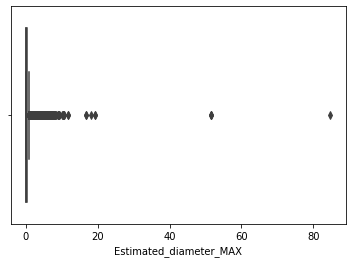

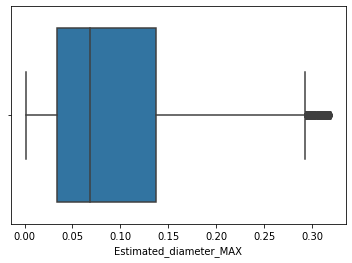

In [32]:
sns.boxplot(df['Estimated_diameter_MAX'])
plt.show()
sns.boxplot(new_df['Estimated_diameter_MAX'])
plt.show()

<AxesSubplot:>

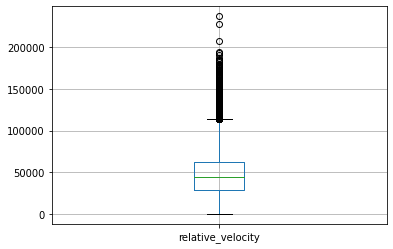

In [33]:
df.boxplot('relative_velocity')

In [34]:
split1 = df['relative_velocity'].quantile(0.25)
split2 = df['relative_velocity'].quantile(0.75)

In [35]:
IQR_func=split2-split2
Upper_bound = split2 + 1.5 * IQR_func
Lower_bound = split2 - 1.5 * IQR_func
df[df['relative_velocity'] > Upper_bound]
df[df['relative_velocity'] < Lower_bound]
new_df = df[df['relative_velocity'] < Upper_bound]
new_df.shape

(68127, 10)

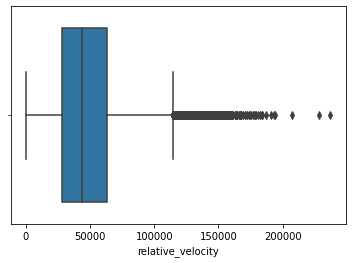

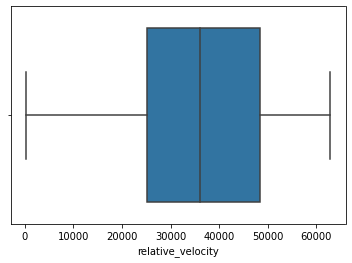

In [36]:
sns.boxplot(df['relative_velocity'])
plt.show()
sns.boxplot(new_df['relative_velocity'])
plt.show()

<AxesSubplot:>

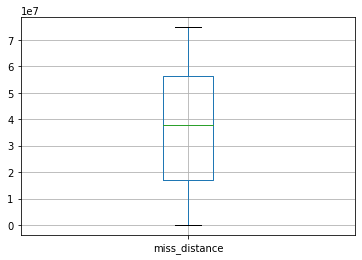

In [37]:
df.boxplot('miss_distance')

# **Splitting Columns**

In [38]:
df['Name_year'] = df.Name.str.split().str.get(0)
df['Name_ID'] = df.Name.str.split().str.get(1) + df.Name.str.split().str.get(2)
df[['Name','Name_year','Name_ID']]

,Name,Name_year,Name_ID
0,162635 (2000 SS164),162635,(2000SS164)
1,277475 (2005 WK4),277475,(2005WK4)
2,512244 (2015 YE18),512244,(2015YE18)
3,(2012 BV13),(2012,NaN
4,(2014 GE35),(2014,NaN
...,...,...,...
90831,(2016 VX1),(2016,NaN
90832,(2019 AD3),(2019,NaN
90833,(2020 JP3),(2020,NaN
90834,(2021 CN5),(2021,NaN


In [39]:
df.head()

,ID,Name,Estimated_diameter_MIN,Estimated_diameter_MAX,relative_velocity,miss_distance,orbiting_body,Monitored_by_Sentry,Impact_Magnitude,hazardous,Name_year,Name_ID
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False,162635,(2000SS164)
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True,277475,(2005WK4)
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False,512244,(2015YE18)
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False,(2012,NaN
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True,(2014,NaN


# **Duplicate Entries**

In [40]:
df_duplicated=df.drop_duplicates('Name')
df.duplicated('Name')

0        False
1        False
2        False
3        False
4        False
         ...  
90831     True
90832     True
90833     True
90834     True
90835     True
Length: 90836, dtype: bool

In [41]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
90831    False
90832    False
90833    False
90834    False
90835    False
Length: 90836, dtype: bool

# **Inconsistent Data**

In [42]:
df.describe()

,ID,Estimated_diameter_MIN,Estimated_diameter_MAX,relative_velocity,miss_distance,Impact_Magnitude
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448110e+06,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


In [43]:
df['Name_ID'].value_counts(dropna=False)

NaN                 78677
Kamo`oalewa(2016       43
(2006FV35)             43
(2000EE104)            39
(2014KQ76)             35
                    ...  
(2009SM103)             1
(2009KC3)               1
(2009JK1)               1
Cernunnos(2009          1
(2007VG184)             1
Name: Name_ID, Length: 2732, dtype: int64

In [44]:
df['ID'].value_counts(dropna=False)

2469219    43
2277810    43
3743123    40
2138175    39
3893865    38
           ..
3768019     1
3774692     1
3779049     1
3775040     1
3092229     1
Name: ID, Length: 27423, dtype: int64

In [45]:
df['miss_distance'].value_counts(dropna=False)

5.603158e+07    2
7.001952e+07    2
4.926247e+07    2
9.079336e+06    2
5.178607e+07    2
               ..
4.460245e+07    1
3.311994e+07    1
2.283126e+07    1
3.238010e+07    1
5.977213e+07    1
Name: miss_distance, Length: 90536, dtype: int64

In [46]:
df['relative_velocity'].value_counts(dropna=False)

34485.841845     2
25338.439042     2
37225.231825     2
36419.712852     2
66082.373737     2
                ..
102750.018447    1
27858.417772     1
18156.451169     1
18470.701216     1
27024.455553     1
Name: relative_velocity, Length: 90828, dtype: int64

In [47]:
df.drop_duplicates()

,ID,Name,Estimated_diameter_MIN,Estimated_diameter_MAX,relative_velocity,miss_distance,orbiting_body,Monitored_by_Sentry,Impact_Magnitude,hazardous,Name_year,Name_ID
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False,162635,(2000SS164)
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True,277475,(2005WK4)
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False,512244,(2015YE18)
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False,(2012,NaN
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True,(2014,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,Earth,False,25.00,False,(2016,NaN
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,Earth,False,26.00,False,(2019,NaN
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,Earth,False,24.60,False,(2020,NaN
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,Earth,False,27.80,False,(2021,NaN


In [48]:
df.fillna(0)

,ID,Name,Estimated_diameter_MIN,Estimated_diameter_MAX,relative_velocity,miss_distance,orbiting_body,Monitored_by_Sentry,Impact_Magnitude,hazardous,Name_year,Name_ID
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False,162635,(2000SS164)
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True,277475,(2005WK4)
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False,512244,(2015YE18)
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False,(2012,0
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True,(2014,0
...,...,...,...,...,...,...,...,...,...,...,...,...
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,Earth,False,25.00,False,(2016,0
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,Earth,False,26.00,False,(2019,0
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,Earth,False,24.60,False,(2020,0
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,Earth,False,27.80,False,(2021,0


In [227]:
df['miss_distance']=df['miss_distance'].astype(float).replace('\0',regex=True)

In [228]:
df.head()

,ID,Name,Estimated_diameter_MIN,Estimated_diameter_MAX,relative_velocity,miss_distance,orbiting_body,Monitored_by_Sentry,Impact_Magnitude,hazardous,Name_ID,Name_year
0,-0.585484,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False,(2000SS164),162635
1,-0.579982,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True,(2005WK4),277475
2,-0.568734,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False,(2015YE18),512244
3,-0.516809,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False,NaN,(2012
4,-0.513403,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True,NaN,(2014


# **DATA TRANSFORMATION**

In [49]:
def log_transform(df,column_t):
    for column_name in column_t:
        if (df[column_name] == 1.0).all():
            df[column_name + '_log'] = np.log(df[column_name]+1)
        else:
            df[column_name + '_log'] = np.log(df[column_name])
    df.info()
log_transform(df,['Estimated_diameter_MIN','Estimated_diameter_MAX'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          90836 non-null  int64  
 1   Name                        90836 non-null  object 
 2   Estimated_diameter_MIN      90836 non-null  float64
 3   Estimated_diameter_MAX      90836 non-null  float64
 4   relative_velocity           90836 non-null  float64
 5   miss_distance               90836 non-null  float64
 6   orbiting_body               90836 non-null  object 
 7   Monitored_by_Sentry         90836 non-null  bool   
 8   Impact_Magnitude            90836 non-null  float64
 9   hazardous                   90836 non-null  bool   
 10  Name_year                   90836 non-null  object 
 11  Name_ID                     12159 non-null  object 
 12  Estimated_diameter_MIN_log  90836 non-null  float64
 13  Estimated_diameter_MAX_log  908

In [50]:
def log_transform(df,column_t):
    for column_name in column_t:
        if (df[column_name] == 1.0).all():
            df[column_name + '_log'] = np.log(df[column_name]+1)
        else:
            df[column_name + '_log'] = np.log(df[column_name])
    df.info()
log_transform(df,['relative_velocity','miss_distance'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          90836 non-null  int64  
 1   Name                        90836 non-null  object 
 2   Estimated_diameter_MIN      90836 non-null  float64
 3   Estimated_diameter_MAX      90836 non-null  float64
 4   relative_velocity           90836 non-null  float64
 5   miss_distance               90836 non-null  float64
 6   orbiting_body               90836 non-null  object 
 7   Monitored_by_Sentry         90836 non-null  bool   
 8   Impact_Magnitude            90836 non-null  float64
 9   hazardous                   90836 non-null  bool   
 10  Name_year                   90836 non-null  object 
 11  Name_ID                     12159 non-null  object 
 12  Estimated_diameter_MIN_log  90836 non-null  float64
 13  Estimated_diameter_MAX_log  908

In [51]:
def log_transform(df,column_t):
    for column_name in column_t:
        if (df[column_name] == 1.0).all():
            df[column_name + '_log'] = np.log(df[column_name]+1)
        else:
            df[column_name + '_log'] = np.log(df[column_name])
    df.info()
log_transform(df,['Impact_Magnitude'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          90836 non-null  int64  
 1   Name                        90836 non-null  object 
 2   Estimated_diameter_MIN      90836 non-null  float64
 3   Estimated_diameter_MAX      90836 non-null  float64
 4   relative_velocity           90836 non-null  float64
 5   miss_distance               90836 non-null  float64
 6   orbiting_body               90836 non-null  object 
 7   Monitored_by_Sentry         90836 non-null  bool   
 8   Impact_Magnitude            90836 non-null  float64
 9   hazardous                   90836 non-null  bool   
 10  Name_year                   90836 non-null  object 
 11  Name_ID                     12159 non-null  object 
 12  Estimated_diameter_MIN_log  90836 non-null  float64
 13  Estimated_diameter_MAX_log  908

In [52]:
df.head()

,ID,Name,Estimated_diameter_MIN,Estimated_diameter_MAX,relative_velocity,miss_distance,orbiting_body,Monitored_by_Sentry,Impact_Magnitude,hazardous,Name_year,Name_ID,Estimated_diameter_MIN_log,Estimated_diameter_MAX_log,relative_velocity_log,miss_distance_log,Impact_Magnitude_log
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False,162635,(2000SS164),0.180880,0.985598,9.515561,17.819926,2.817204
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True,277475,(2005WK4),-1.325011,-0.520292,11.206247,17.933541,2.995732
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False,512244,(2015YE18),-0.325689,0.479030,11.646220,17.723500,2.880882
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False,(2012,NaN,-2.338149,-1.533430,10.117159,17.051636,3.100092
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True,(2014,NaN,-1.366458,-0.561739,10.662838,17.650125,3.000222


<AxesSubplot:xlabel='Estimated_diameter_MAX_log', ylabel='Density'>

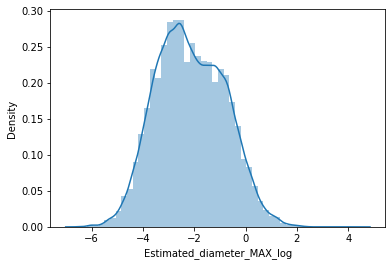

In [53]:
sns.distplot(df['Estimated_diameter_MAX_log'])

<AxesSubplot:xlabel='Estimated_diameter_MIN_log', ylabel='Density'>

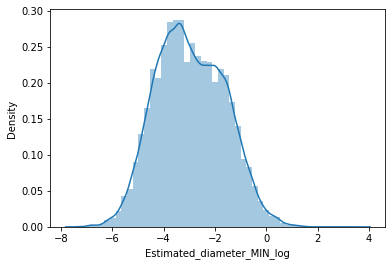

In [65]:
sns.distplot(df['Estimated_diameter_MIN_log'])

<AxesSubplot:xlabel='Impact_Magnitude_log', ylabel='Density'>

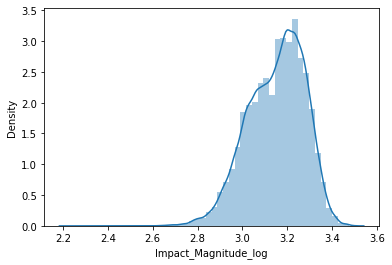

In [78]:
sns.distplot(df['Impact_Magnitude_log'])

# **EDA(Explanatory Data Analysis) Univariate Analysis**

In [54]:
categorical_columns=df.select_dtypes(include=['object']).columns
Numerical_columns = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Values:")
print(categorical_columns)
print("Numerical Values:")
print(Numerical_columns)

Categorical Values:
Index(['Name', 'orbiting_body', 'Name_year', 'Name_ID'], dtype='object')
Numerical Values:
['ID', 'Estimated_diameter_MIN', 'Estimated_diameter_MAX', 'relative_velocity', 'miss_distance', 'Impact_Magnitude', 'Estimated_diameter_MIN_log', 'Estimated_diameter_MAX_log', 'relative_velocity_log', 'miss_distance_log', 'Impact_Magnitude_log']


In [55]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,90836.0,NaN,NaN,NaN,14382878.05216,20872018.353893,2000433.0,3448110.0,3748362.0,3884023.0,54275914.0
Name,90836,27423,469219 Kamo`oalewa (2016 HO3),43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Estimated_diameter_MIN,90836.0,NaN,NaN,NaN,0.127432,0.298511,0.000609,0.019256,0.048368,0.143402,37.89265
Estimated_diameter_MAX,90836.0,NaN,NaN,NaN,0.284947,0.667491,0.001362,0.043057,0.108153,0.320656,84.730541
relative_velocity,90836.0,NaN,NaN,NaN,48066.918918,25293.296961,203.346433,28619.020645,44190.11789,62923.604633,236990.128088
miss_distance,90836.0,NaN,NaN,NaN,37066546.030422,22352040.59919,6745.532516,17210820.235765,37846579.263426,56548996.451399,74798651.452197
orbiting_body,90836,1,Earth,90836,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Monitored_by_Sentry,90836,1,False,90836,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Impact_Magnitude,90836.0,NaN,NaN,NaN,23.527103,2.894086,9.23,21.34,23.7,25.7,33.2
hazardous,90836,2,False,81996,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **BOX PLOT**

ID
1.38


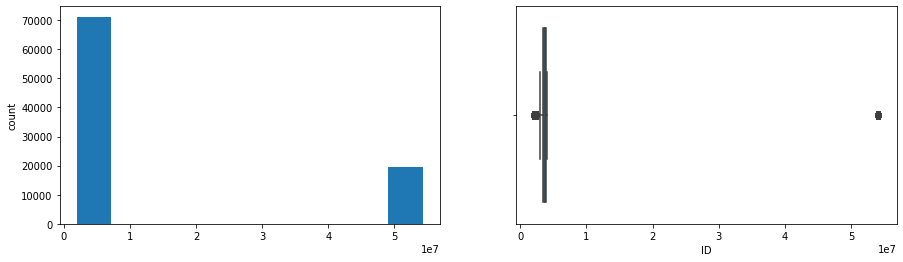

Estimated_diameter_MIN
41.14


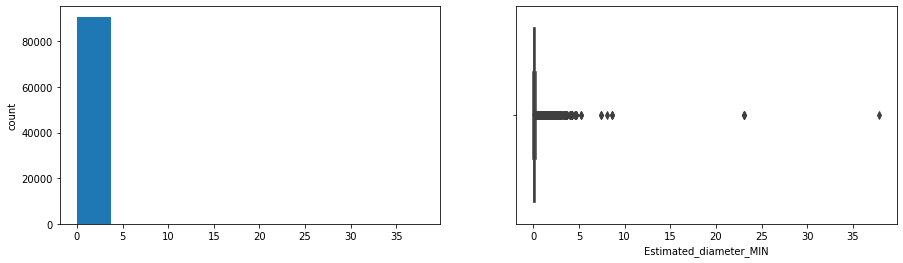

Estimated_diameter_MAX
41.14


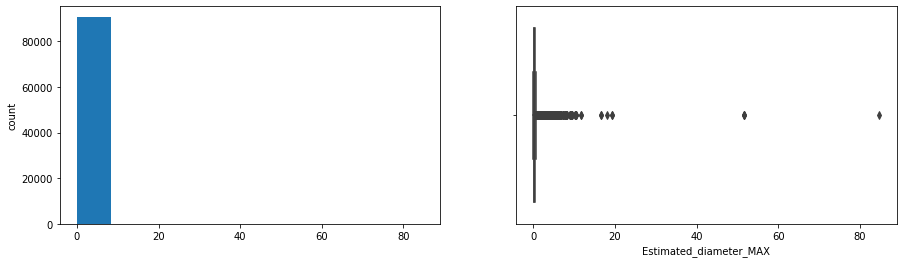

relative_velocity
0.91


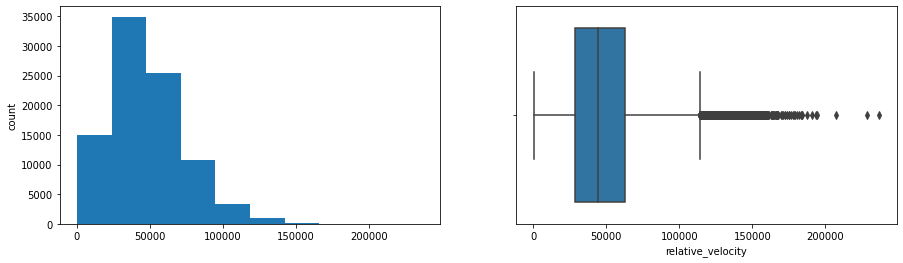

miss_distance
-0.04


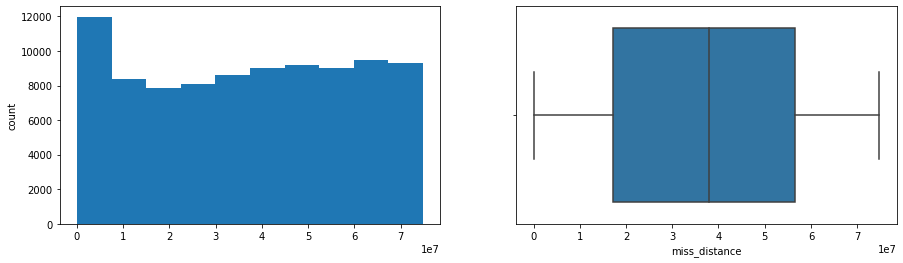

Impact_Magnitude
-0.14


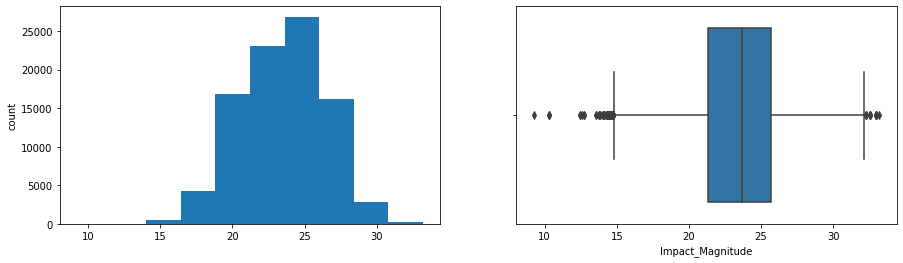

Estimated_diameter_MIN_log
0.14


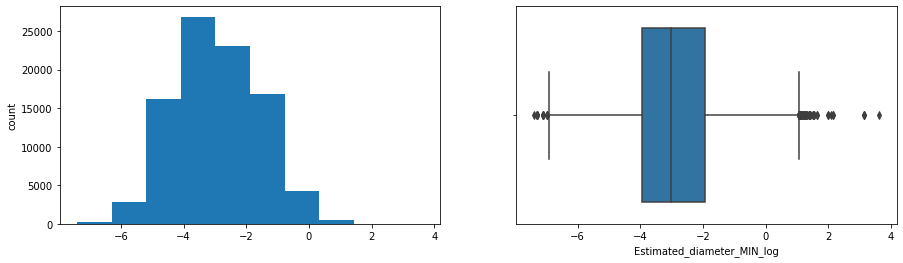

Estimated_diameter_MAX_log
0.14


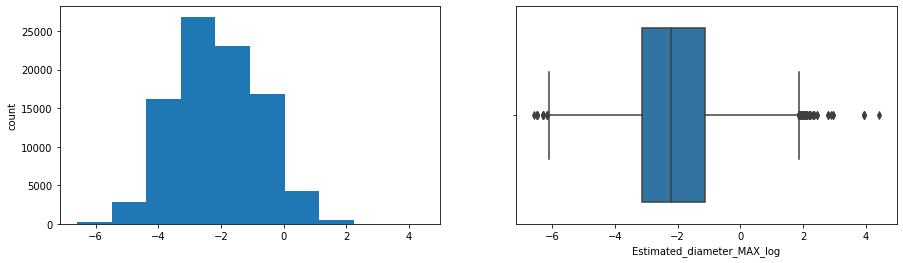

relative_velocity_log
-0.69


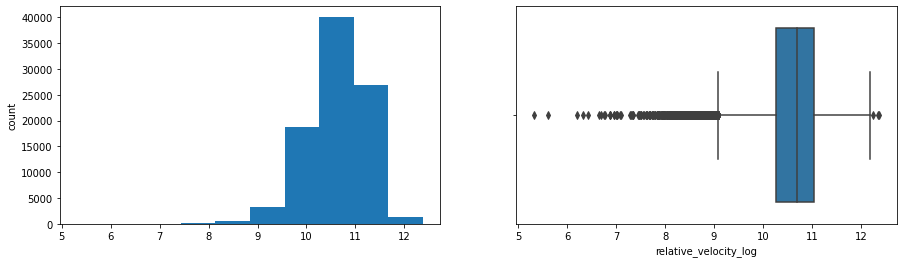

miss_distance_log
-1.9


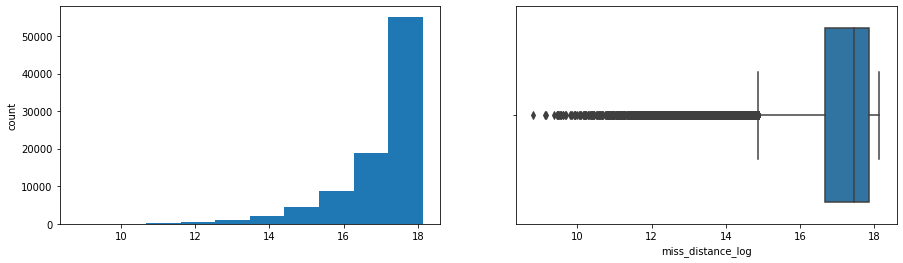

Impact_Magnitude_log
-0.45


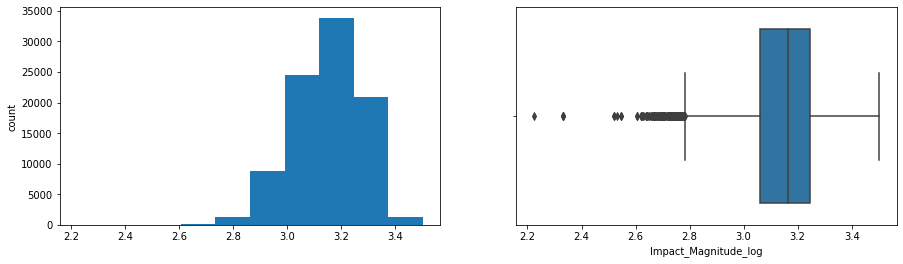

In [81]:
for Columns1 in Numerical_columns:
    print(Columns1)
    print(round(df[Columns1].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[Columns1].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[Columns1])
    plt.show()

# **HISTOGRAM**

ID
1.38


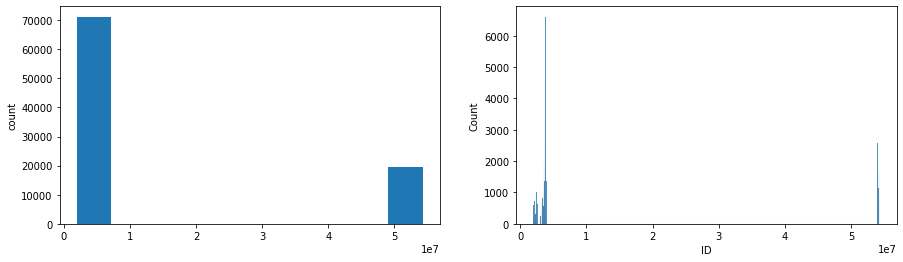

Estimated_diameter_MIN
41.14


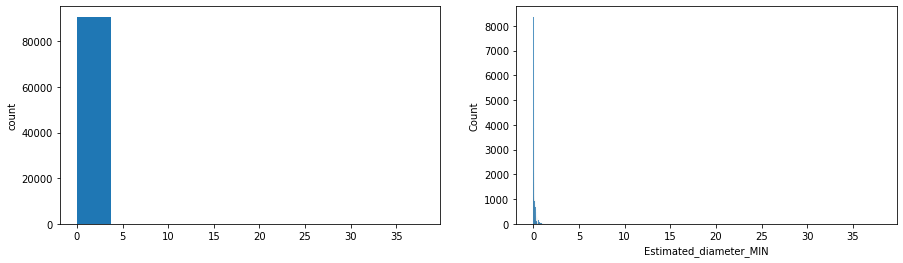

Estimated_diameter_MAX
41.14


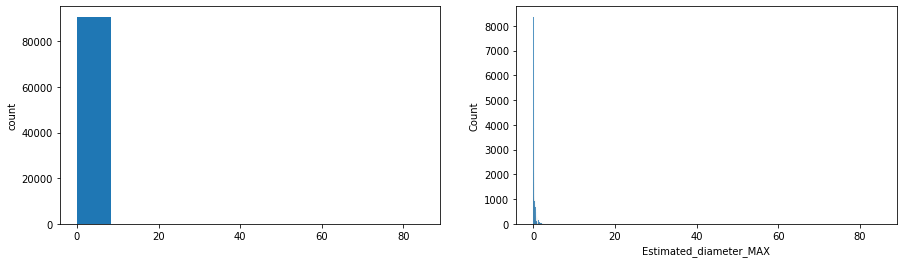

relative_velocity
0.91


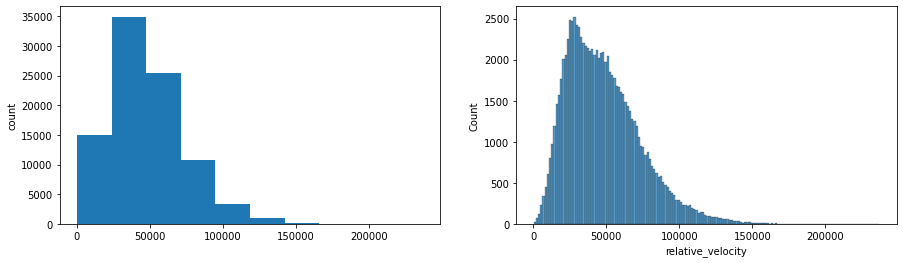

miss_distance
-0.04


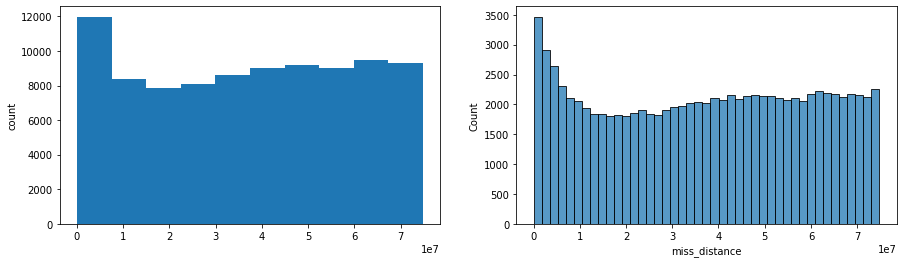

Impact_Magnitude
-0.14


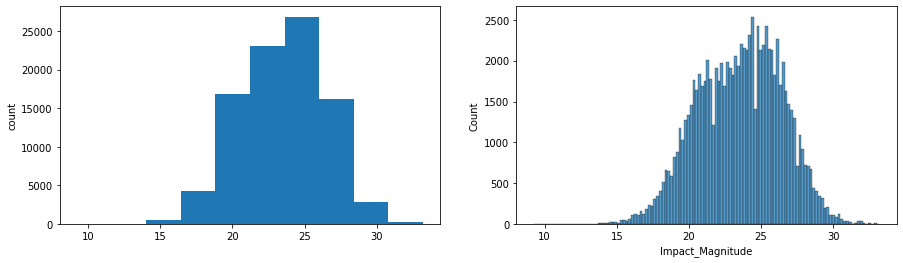

Estimated_diameter_MIN_log
0.14


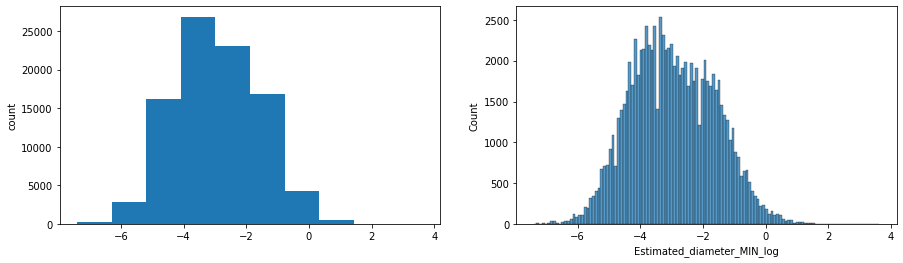

Estimated_diameter_MAX_log
0.14


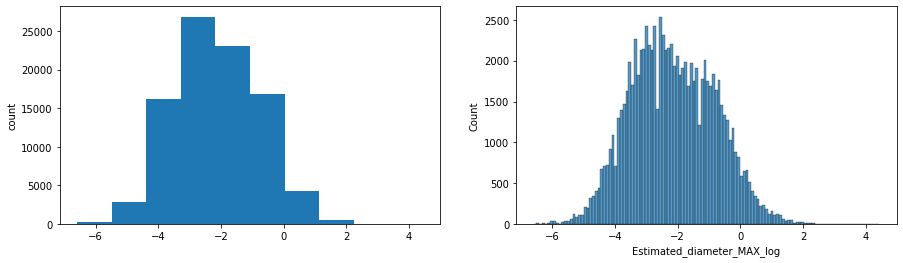

relative_velocity_log
-0.69


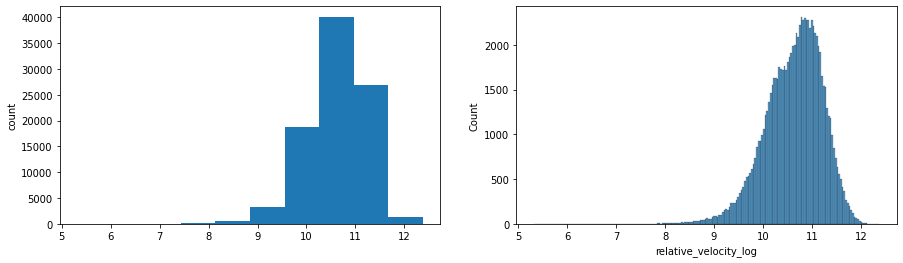

miss_distance_log
-1.9


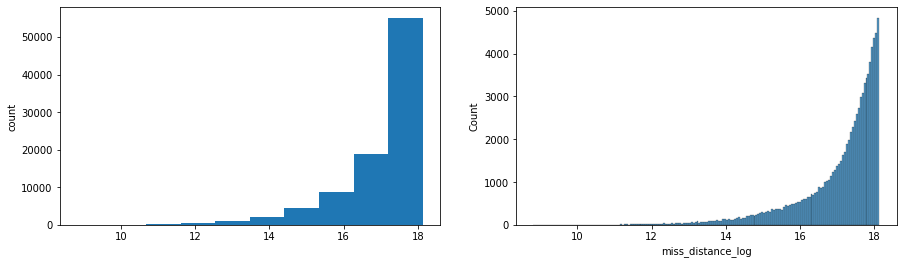

Impact_Magnitude_log
-0.45


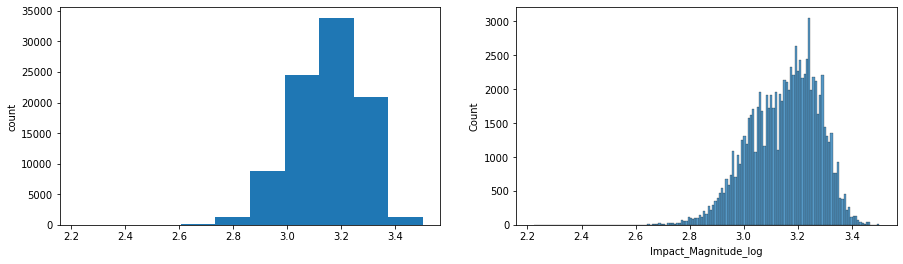

In [82]:
for Columns1 in Numerical_columns:
    print(Columns1)
    print(round(df[Columns1].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[Columns1].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.histplot(x=df[Columns1])
    plt.show()

# **DENSITY PLOT**

ID
1.38


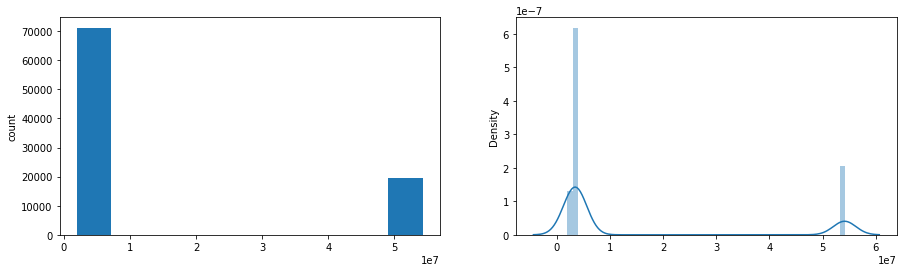

Estimated_diameter_MIN
41.14


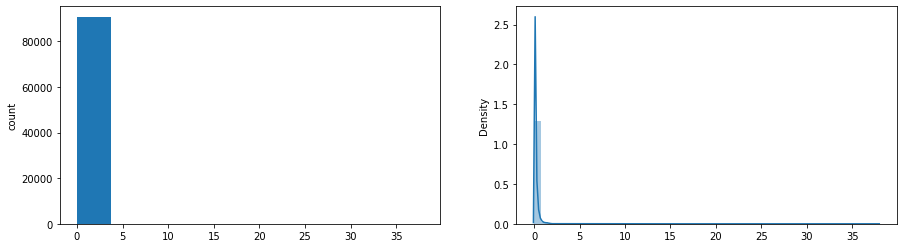

Estimated_diameter_MAX
41.14


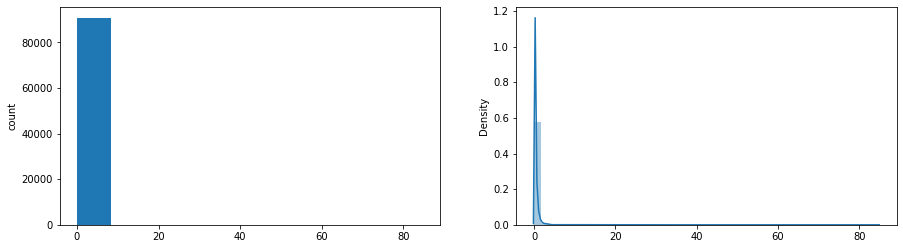

relative_velocity
0.91


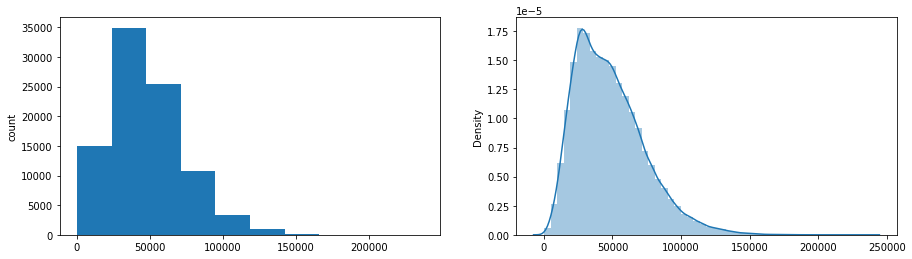

miss_distance
-0.04


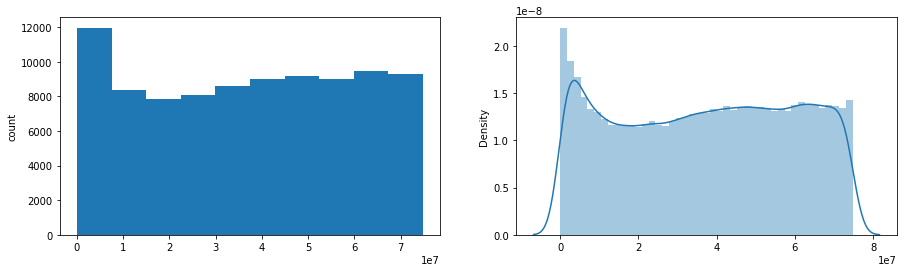

Impact_Magnitude
-0.14


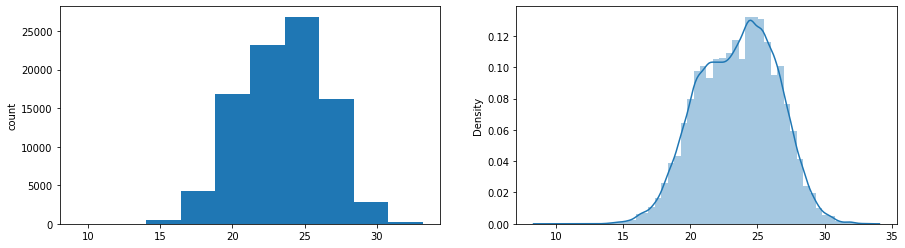

Estimated_diameter_MIN_log
0.14


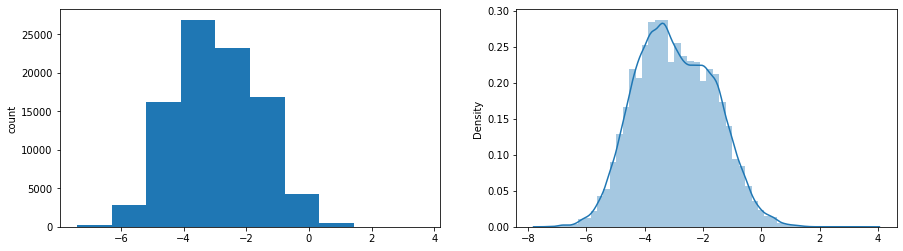

Estimated_diameter_MAX_log
0.14


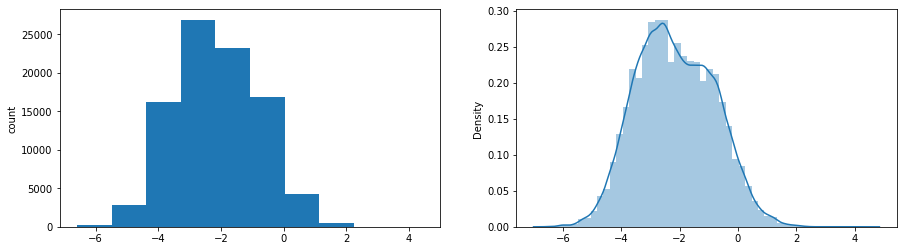

relative_velocity_log
-0.69


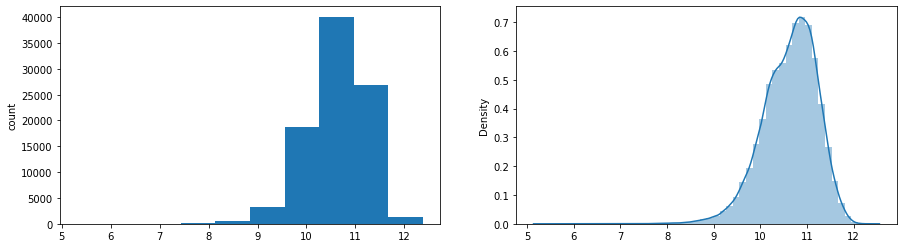

miss_distance_log
-1.9


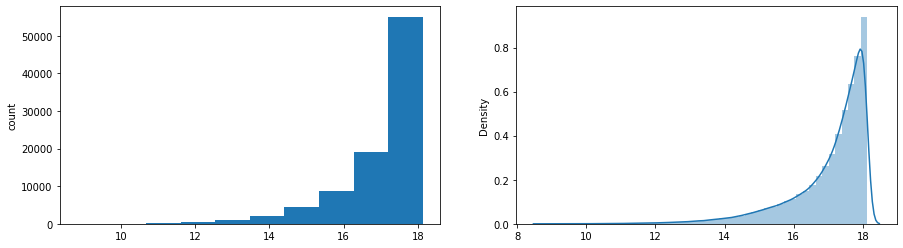

Impact_Magnitude_log
-0.45


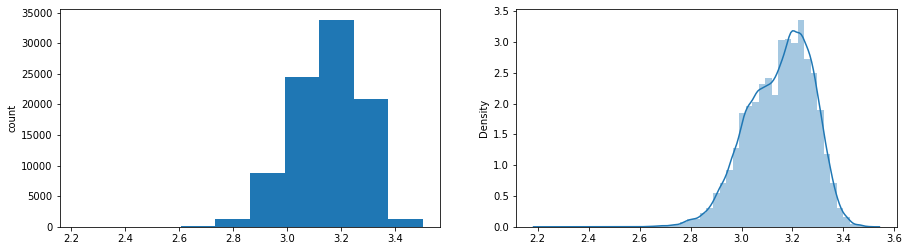

In [83]:
for Columns1 in Numerical_columns:
    print(Columns1)
    print(round(df[Columns1].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[Columns1].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.distplot(x=df[Columns1])
    plt.show()

ID
1.38


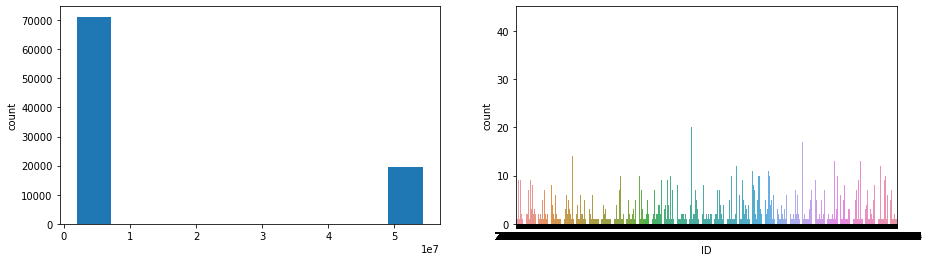

Estimated_diameter_MIN
41.14


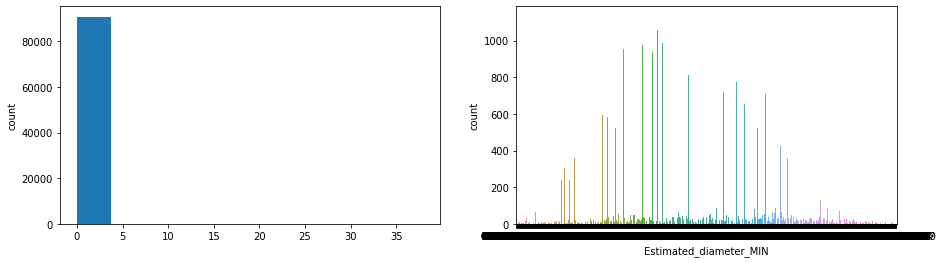

Estimated_diameter_MAX
41.14


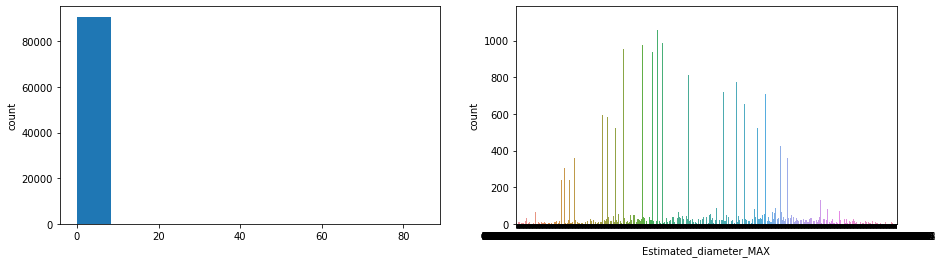

relative_velocity
0.91


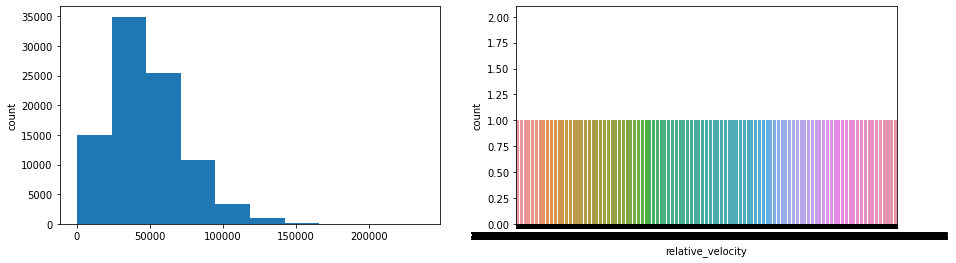

miss_distance
-0.04


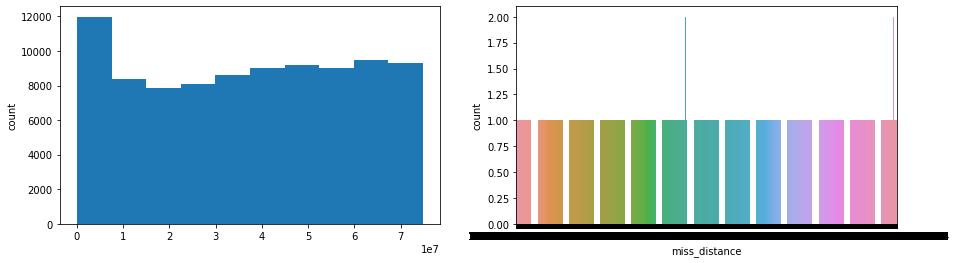

Impact_Magnitude
-0.14


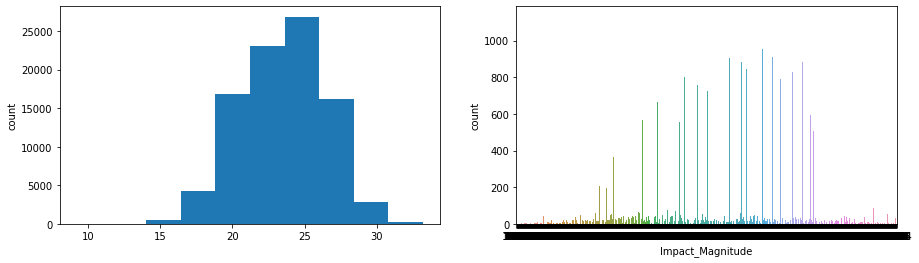

Estimated_diameter_MIN_log
0.14


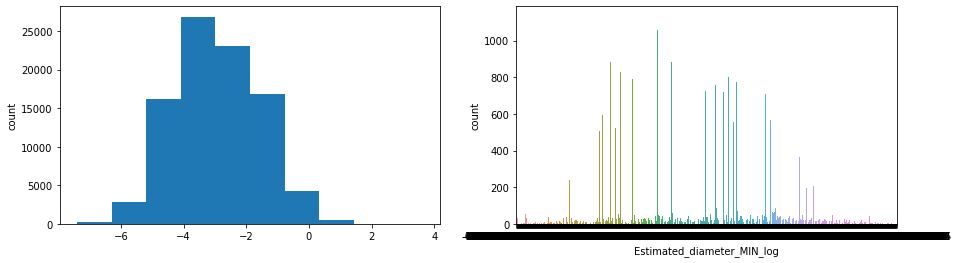

Estimated_diameter_MAX_log
0.14


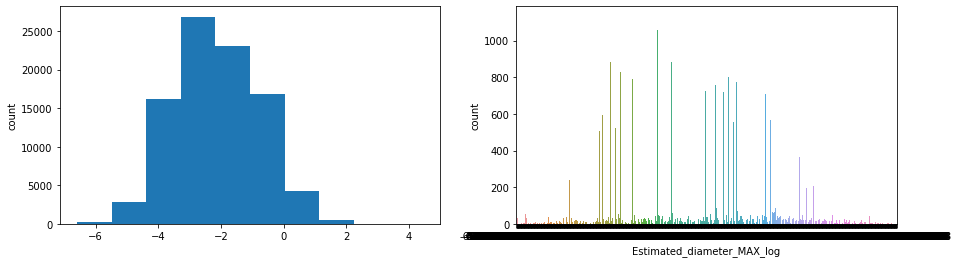

relative_velocity_log
-0.69


KeyboardInterrupt: ignored

In [94]:
for Columns1 in Numerical_columns:
    print(Columns1)
    print(round(df[Columns1].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[Columns1].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.countplot(x=df[Columns1])
    plt.show()

# **EDA (Exploratory Data Analysis) BIVARIATE ANALYSIS**

In [87]:
df.head()

,ID,Name,Estimated_diameter_MIN,Estimated_diameter_MAX,relative_velocity,miss_distance,orbiting_body,Monitored_by_Sentry,Impact_Magnitude,hazardous,Name_year,Name_ID,Estimated_diameter_MIN_log,Estimated_diameter_MAX_log,relative_velocity_log,miss_distance_log,Impact_Magnitude_log
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False,162635,(2000SS164),0.180880,0.985598,9.515561,17.819926,2.817204
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True,277475,(2005WK4),-1.325011,-0.520292,11.206247,17.933541,2.995732
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False,512244,(2015YE18),-0.325689,0.479030,11.646220,17.723500,2.880882
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False,(2012,NaN,-2.338149,-1.533430,10.117159,17.051636,3.100092
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True,(2014,NaN,-1.366458,-0.561739,10.662838,17.650125,3.000222


# **POINT PLOT**

<AxesSubplot:xlabel='Impact_Magnitude_log', ylabel='Monitored_by_Sentry'>

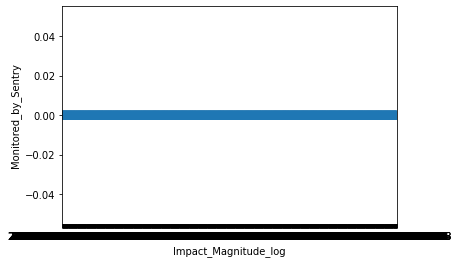

In [91]:
sns.pointplot(x='Impact_Magnitude_log',y='Monitored_by_Sentry',data=df) 

<AxesSubplot:xlabel='Impact_Magnitude_log', ylabel='relative_velocity_log'>

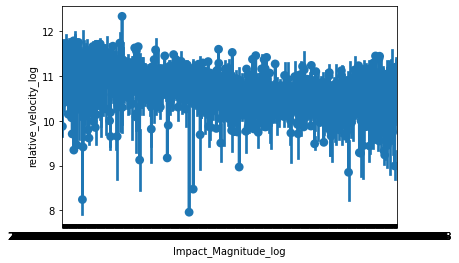

In [59]:
sns.pointplot(x='Impact_Magnitude_log',y='relative_velocity_log',data=df,) 

<AxesSubplot:xlabel='Impact_Magnitude_log', ylabel='Estimated_diameter_MIN_log'>

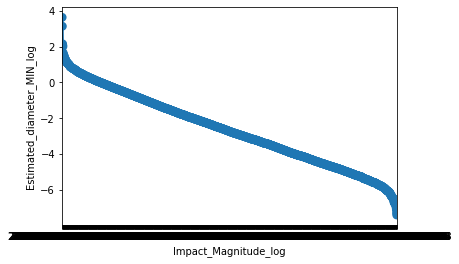

In [99]:
sns.pointplot(x='Impact_Magnitude_log',y='Estimated_diameter_MIN_log',data=df) 

<AxesSubplot:xlabel='Impact_Magnitude_log', ylabel='Estimated_diameter_MAX_log'>

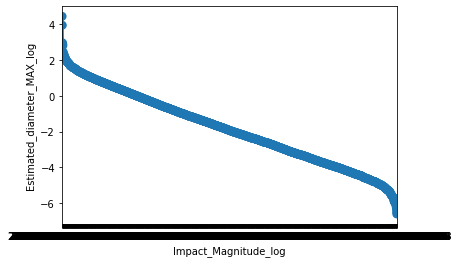

In [100]:
sns.pointplot(x='Impact_Magnitude_log',y='Estimated_diameter_MAX_log',data=df) 

<AxesSubplot:xlabel='Impact_Magnitude_log', ylabel='miss_distance_log'>

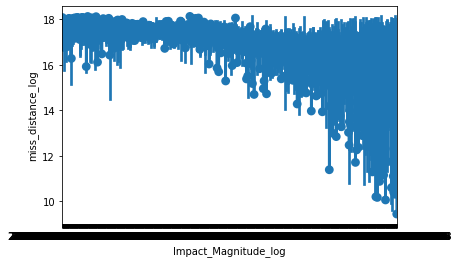

In [101]:
sns.pointplot(x='Impact_Magnitude_log',y='miss_distance_log',data=df) 

<AxesSubplot:xlabel='Impact_Magnitude_log', ylabel='relative_velocity_log'>

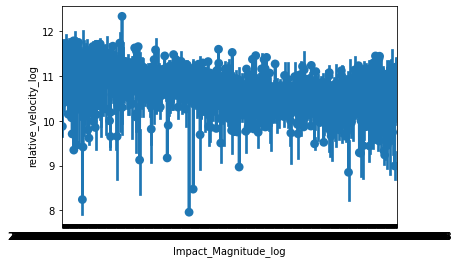

In [103]:
sns.pointplot(x='Impact_Magnitude_log',y='relative_velocity_log',data=df) 

# **REGRESSION PLOT**

<AxesSubplot:xlabel='Impact_Magnitude_log', ylabel='Estimated_diameter_MIN_log'>

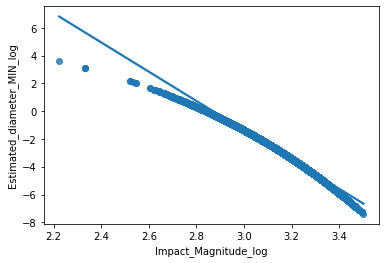

In [93]:
sns.regplot(x='Impact_Magnitude_log',y='Estimated_diameter_MIN_log',data=df) 

<AxesSubplot:xlabel='Impact_Magnitude_log', ylabel='Monitored_by_Sentry'>

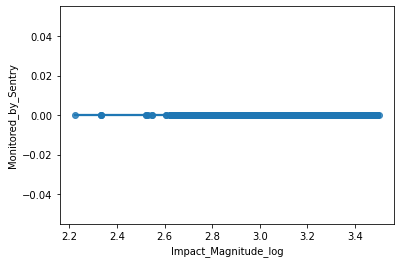

In [90]:
sns.regplot(x='Impact_Magnitude_log',y='Monitored_by_Sentry',data=df) 

<AxesSubplot:xlabel='relative_velocity', ylabel='Monitored_by_Sentry'>

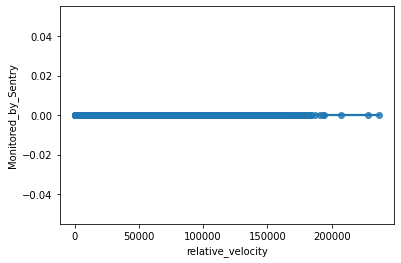

In [88]:
sns.regplot(x='relative_velocity',y='Monitored_by_Sentry',data=df) 

<AxesSubplot:xlabel='relative_velocity_log', ylabel='miss_distance'>

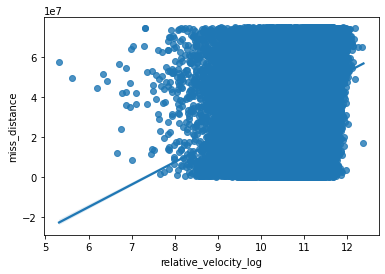

In [87]:
sns.regplot(x='relative_velocity_log',y='miss_distance',data=df) 

<AxesSubplot:xlabel='Impact_Magnitude_log', ylabel='Estimated_diameter_MAX_log'>

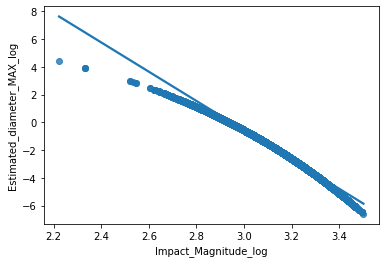

In [94]:
sns.regplot(x='Impact_Magnitude_log',y='Estimated_diameter_MAX_log',data=df) 

<AxesSubplot:xlabel='Impact_Magnitude_log', ylabel='miss_distance_log'>

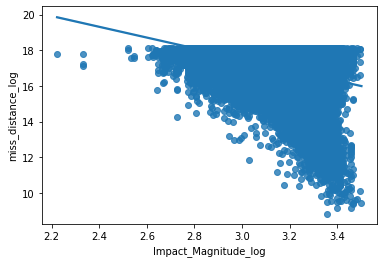

In [95]:
sns.regplot(x='Impact_Magnitude_log',y='miss_distance_log',data=df) 

<AxesSubplot:xlabel='miss_distance_log', ylabel='Estimated_diameter_MAX_log'>

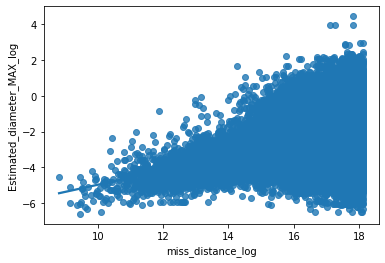

In [96]:
sns.regplot(x='miss_distance_log',y='Estimated_diameter_MAX_log',data=df) 

# **EDA (Exploratory Data Analysis) MULTIVARIATE ANALYSIS**

# **Pairplot**

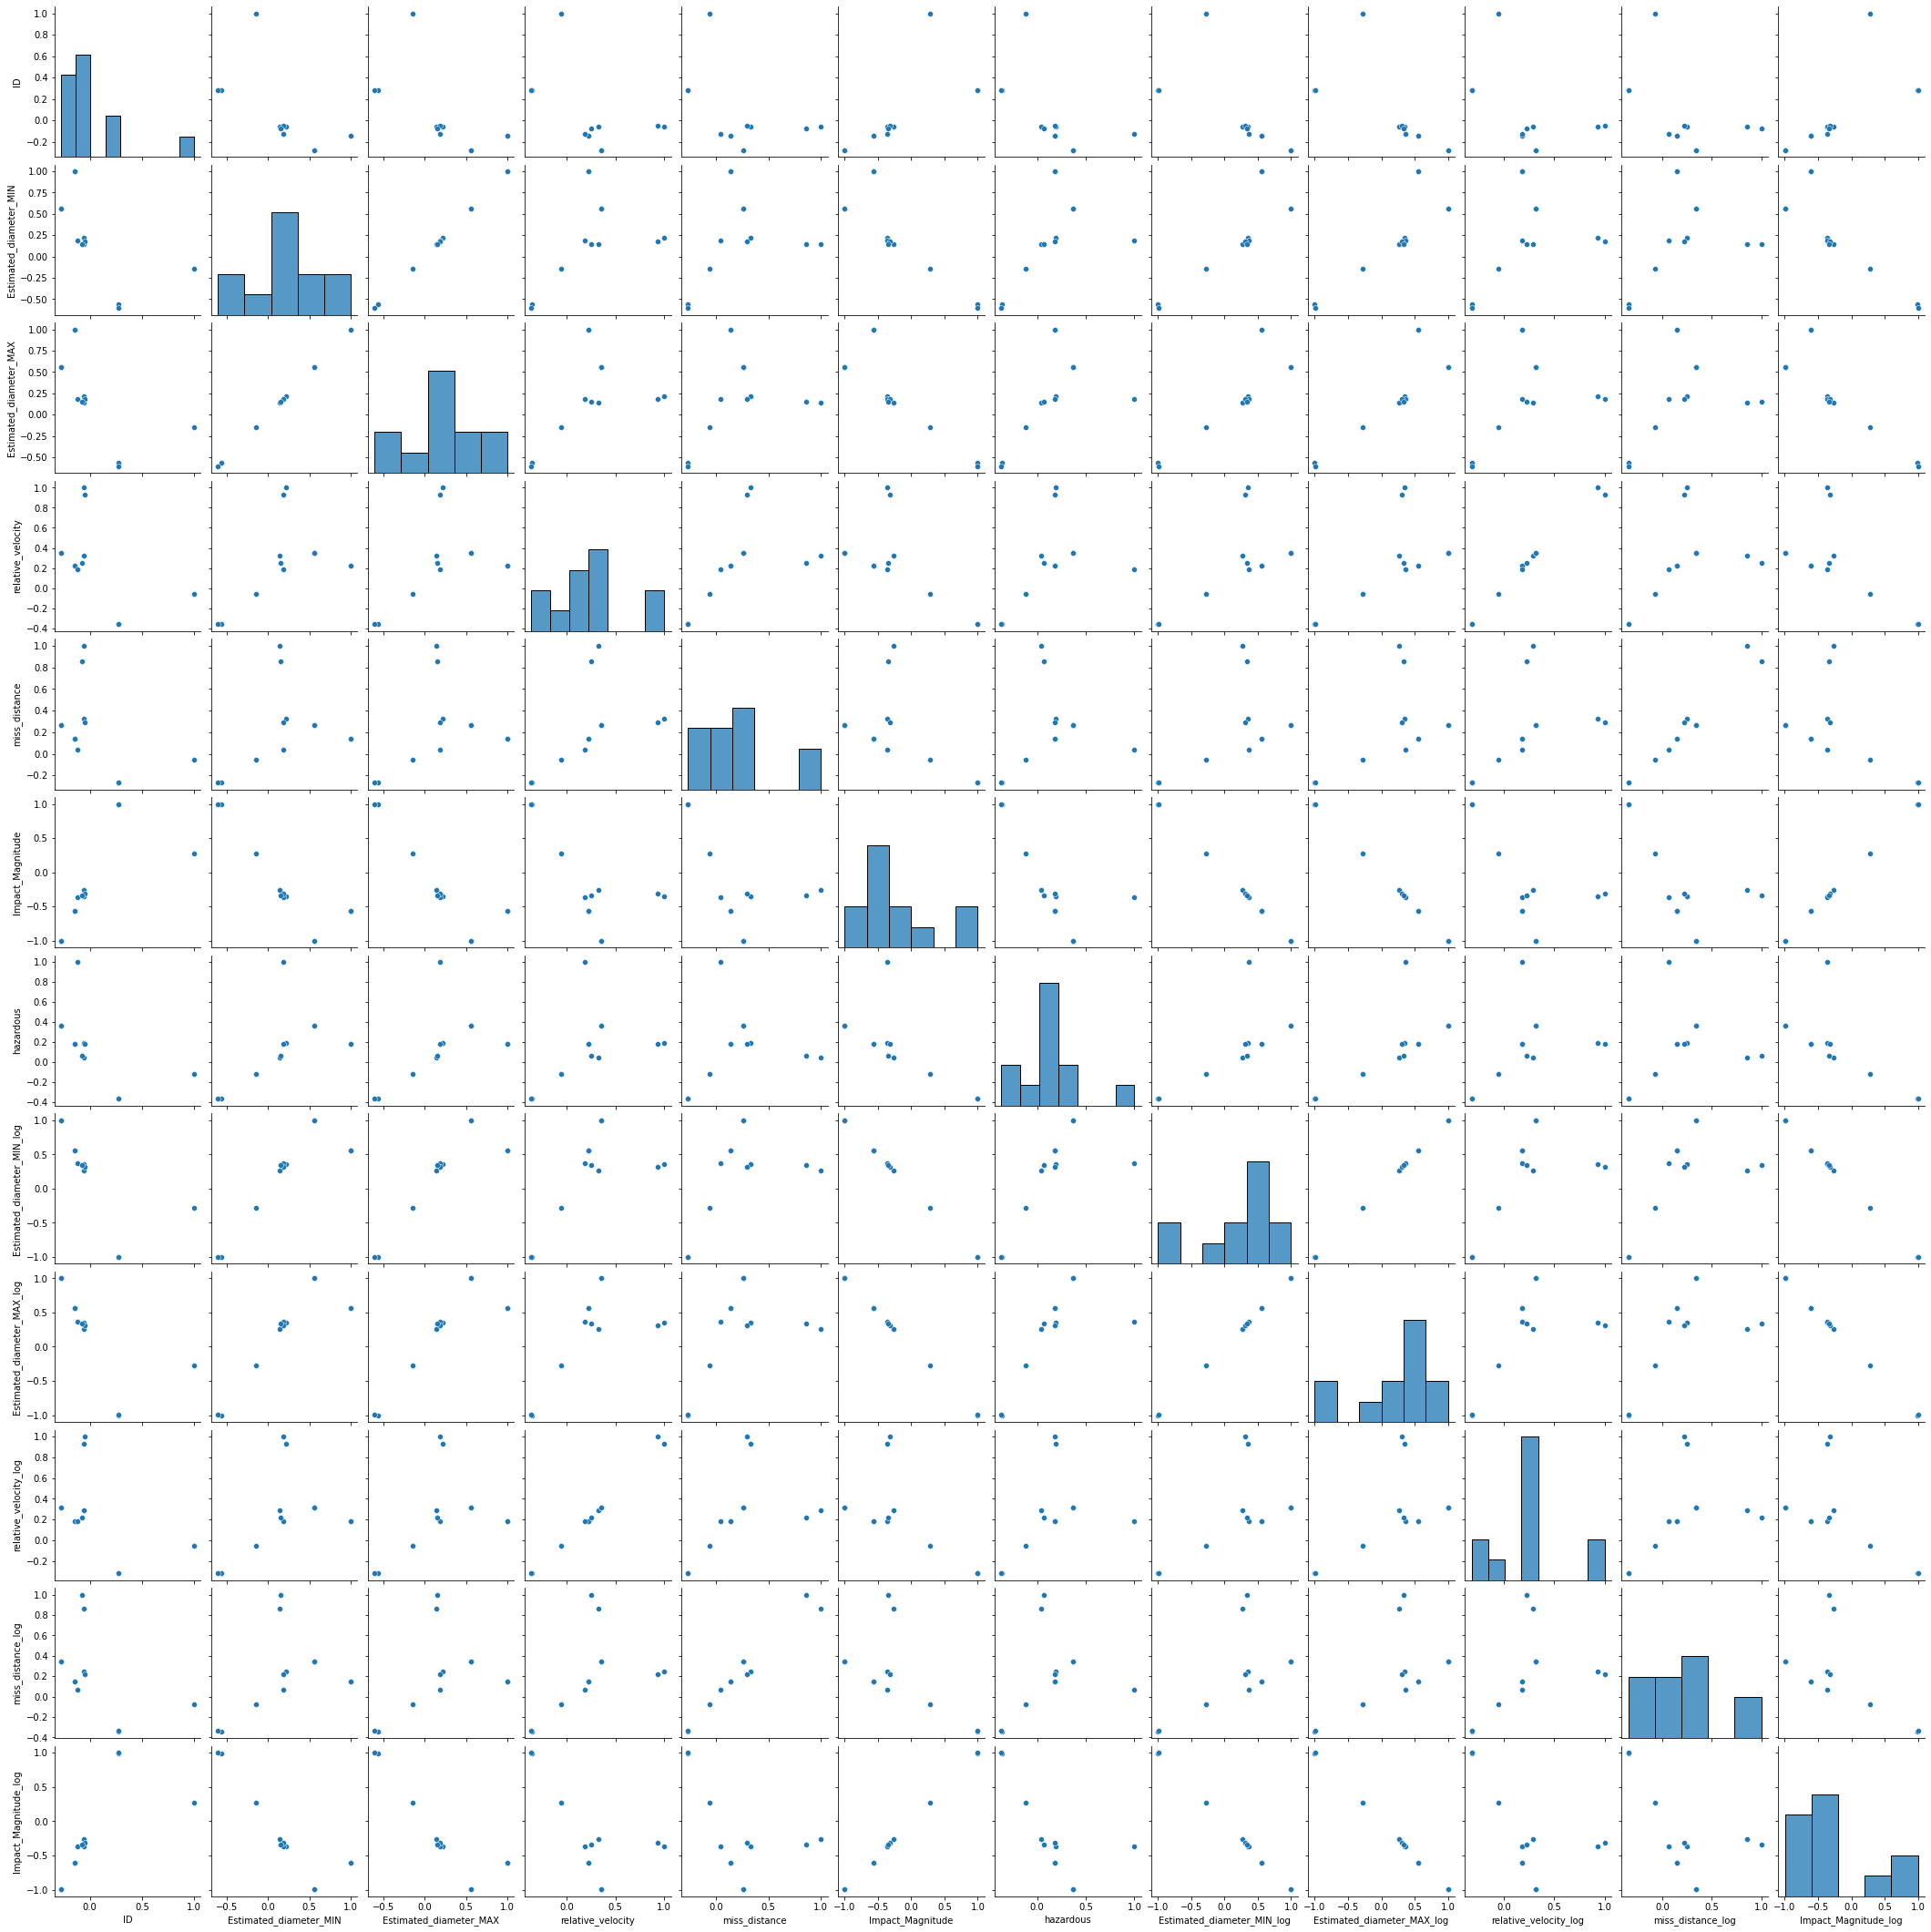

In [81]:
sns.pairplot(df.drop(['Monitored_by_Sentry'],axis=1).corr())
plt.show()

# **Heatmap**

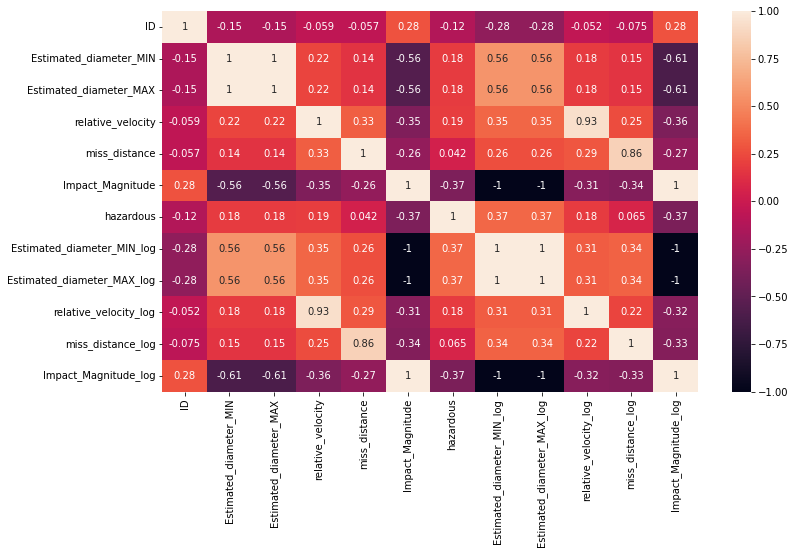

In [73]:
plt.figure(figsize=(12, 7))
sns.heatmap(df.drop(['Monitored_by_Sentry'],axis=1).corr(), annot = True)
plt.show()

# **Scatter plot**

<AxesSubplot:xlabel='Impact_Magnitude_log', ylabel='Estimated_diameter_MIN_log'>

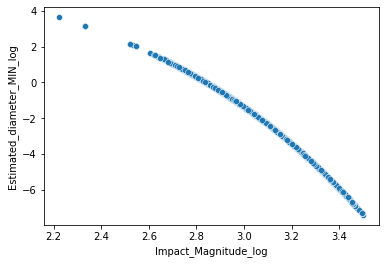

In [ ]:
sns.scatterplot(x='Impact_Magnitude_log',y='Estimated_diameter_MIN_log',data=df) 

<AxesSubplot:xlabel='Impact_Magnitude_log', ylabel='Monitored_by_Sentry'>

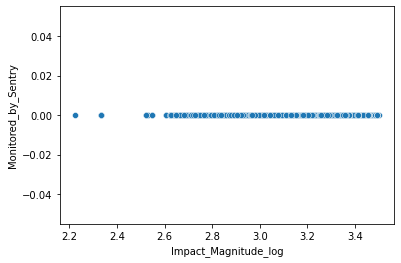

In [ ]:
sns.scatterplot(x='Impact_Magnitude_log',y='Monitored_by_Sentry',data=df) 

<AxesSubplot:xlabel='relative_velocity', ylabel='Monitored_by_Sentry'>

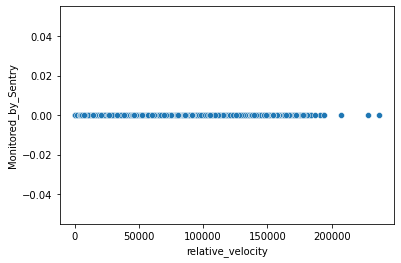

In [ ]:
sns.scatterplot(x='relative_velocity',y='Monitored_by_Sentry',data=df) 

<AxesSubplot:xlabel='relative_velocity_log', ylabel='miss_distance'>

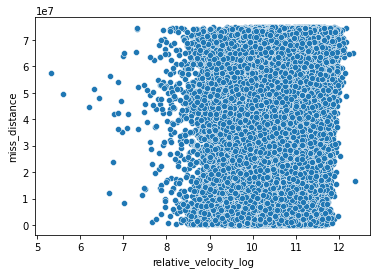

In [ ]:
sns.scatterplot(x='relative_velocity_log',y='miss_distance',data=df) 

<AxesSubplot:xlabel='Impact_Magnitude_log', ylabel='Estimated_diameter_MAX_log'>

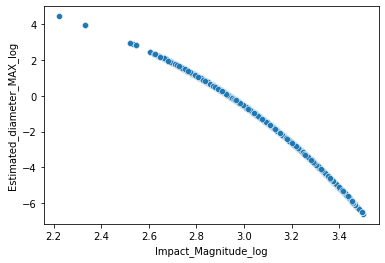

In [ ]:
sns.scatterplot(x='Impact_Magnitude_log',y='Estimated_diameter_MAX_log',data=df) 

<AxesSubplot:xlabel='Impact_Magnitude_log', ylabel='miss_distance_log'>

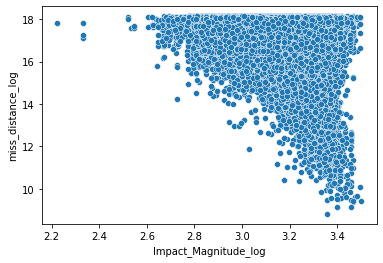

In [ ]:
sns.scatterplot(x='Impact_Magnitude_log',y='miss_distance_log',data=df) 

<AxesSubplot:xlabel='miss_distance_log', ylabel='Estimated_diameter_MAX_log'>

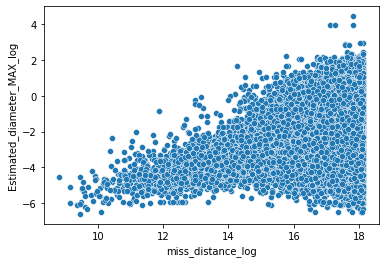

In [ ]:
sns.scatterplot(x='miss_distance_log',y='Estimated_diameter_MAX_log',data=df) 

# **LM plot**

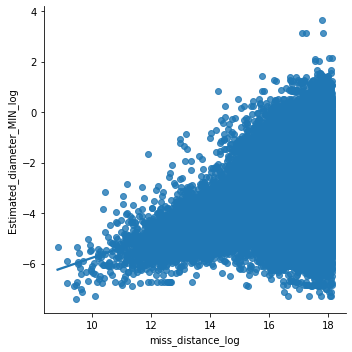

In [ ]:
sns.lmplot(x='miss_distance_log',y='Estimated_diameter_MIN_log',data=df) 

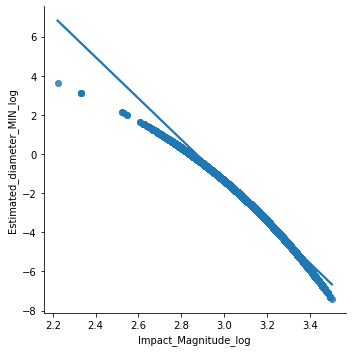

In [ ]:
sns.lmplot(x='Impact_Magnitude_log',y='Estimated_diameter_MIN_log',data=df) 

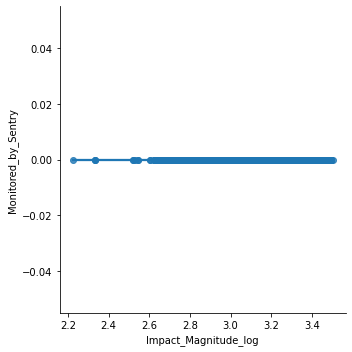

In [ ]:
sns.lmplot(x='Impact_Magnitude_log',y='Monitored_by_Sentry',data=df) 

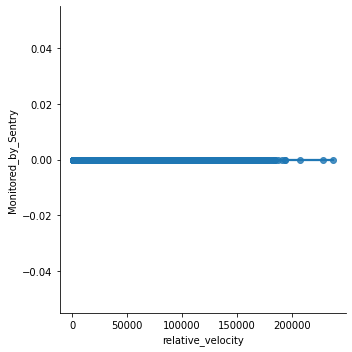

In [ ]:
sns.lmplot(x='relative_velocity',y='Monitored_by_Sentry',data=df) 

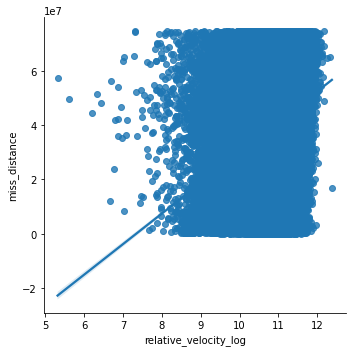

In [ ]:
sns.lmplot(x='relative_velocity_log',y='miss_distance',data=df) 

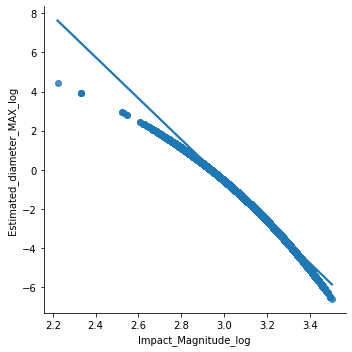

In [ ]:
sns.lmplot(x='Impact_Magnitude_log',y='Estimated_diameter_MAX_log',data=df) 

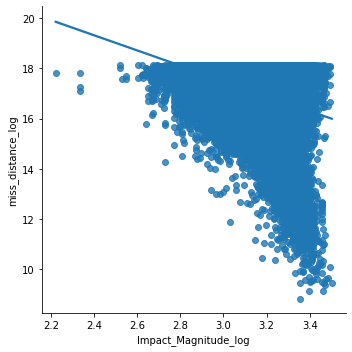

In [ ]:
sns.lmplot(x='Impact_Magnitude_log',y='miss_distance_log',data=df) 

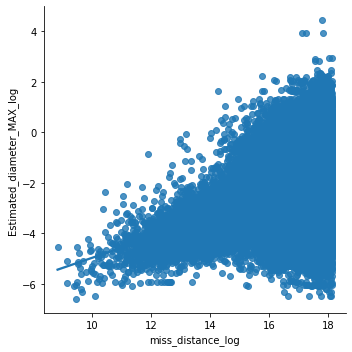

In [ ]:
sns.lmplot(x='miss_distance_log',y='Estimated_diameter_MAX_log',data=df) 

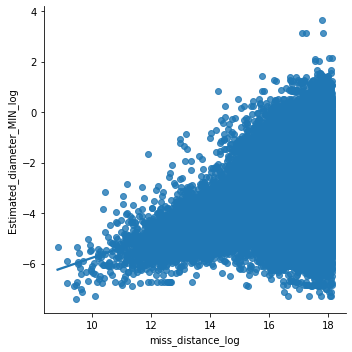

In [ ]:
sns.lmplot(x='miss_distance_log',y='Estimated_diameter_MIN_log',data=df) 